Helpful reference that I found: https://mc-stan.org/users/documentation/case-studies/pystan_workflow.html


In [2]:
import pystan
import numpy as np

ocode = """
data {
    int<lower=1> N;
    real y[N];
}
parameters {
    real mu;
}
model {
    y ~ normal(mu, 1);
}
"""
sm = pystan.StanModel(model_code=ocode)
y2 = np.random.normal(size=20)
print(np.mean(y2))

op = sm.optimizing(data=dict(y=y2, N=len(y2)))

op

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3aaa1aff3be33470f8a5bfa56085d51c NOW.


0.36129051109778715


OrderedDict([('mu', array(0.36129051))])

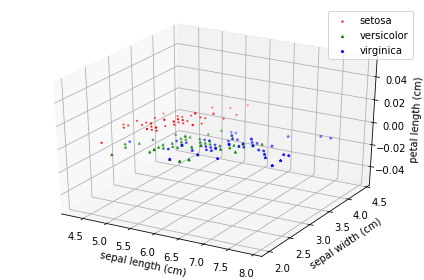

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
x = np.delete(iris['data'], 3, 1)
y = iris['target']
names = iris['target_names']
feature_names = np.delete(iris['feature_names'], 3)
# removed some features to speed up optimization and make it 3d graphable :)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter_0 = plt.scatter(x[:,0][0:49], x[:,1][0:49], x[:,2][0:49], c="r", marker="o", label=names[0])
scatter_1 = plt.scatter(x[:,0][50:99], x[:,1][50:99], x[:,2][50:99], c="g", marker="^", label=names[1])
scatter_2 = plt.scatter(x[:,0][100:149], x[:,1][100:149], x[:,2][100:149], c="b", marker="*", label=names[2])

plt.legend(handles=[scatter_0, scatter_1, scatter_2])
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])

fig.tight_layout()

plt.show()

In [ ]:
ocode = """
data {
    int<lower=1> N;
    real y[N];
    real functions = 9;
}
parameters {
    real mu[functions];
    real sigma[functions];
}
model {
    setosa_sepal_length ~ normal(mu[0], sigma[0]);
    setosa_sepal_width ~ normal(mu[1], sigma[1]);
    setosa_petal_length ~ normal(mu[2], sigma[2]);
    
    versicolor_sepal_length ~ normal(mu[3], sigma[3]);
    versicolor_sepal_width ~ normal(mu[4], sigma[4]);
    versicolor_petal_length ~ normal(mu[5], sigma[5]);
    
    virginica_sepal_length ~ normal(mu[6], sigma[6]);
    virginica_sepal_width ~ normal(mu[7], sigma[7]);
    virginica_petal_length ~ normal(mu[8], sigma[8]);
}
"""
sm = pystan.StanModel(model_code=ocode)
y2 = np.random.normal(size=20)
print(np.mean(y2))

op = sm.optimizing(data=dict(y=y2, N=len(y2)))

op